## Data Mergin Basics

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

### What column to merge on?

In [77]:
taxi_veh = pd.read_pickle('datasets/joining-data-dataset/taxi_vehicles.p')
taxi_owners = pd.read_pickle('datasets/joining-data-dataset/taxi_owners.p')

In [78]:
taxi_veh.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [79]:
taxi_owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [80]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid")
taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


### Your first inner join

In [81]:
taxi_own_veh = taxi_owners.merge(taxi_veh, on="vid", suffixes=('_own','_veh'))
taxi_own_veh.head()

,rid,vid,owner_own,address,zip,make,model,year,fuel_type,owner_veh
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [82]:
taxi_own_veh["fuel_type"].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

### Inner joins and number of rows returned

In [83]:
wards = pd.read_pickle('datasets/joining-data-dataset/ward.p')
census = pd.read_pickle('datasets/joining-data-dataset/census.p')

In [84]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [85]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [86]:
wards_census = wards.merge(census, on="ward")
wards_census.head()

,ward,alderman,address_x,zip_x,pop_2000,pop_2010,change,address_y,zip_y
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [87]:
wards_census.shape

(50, 9)

In [88]:
wards_altered = wards.copy()
wards_altered.loc[:,"ward"][0] = 61
wards_altered.head()

,ward,alderman,address,zip
0,61,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [89]:
census_altered = census.copy()
census_altered.loc[:,"ward"][0] = None
census_altered.head()

/var/folders/90/8s3g00fs0338q4cmpsc8yxqw0000gn/T/ipykernel_11571/875349235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_altered.loc[:,"ward"][0] = None


,ward,pop_2000,pop_2010,change,address,zip
0,None,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [90]:
wards_altered_census = wards_altered.merge(census, on="ward")
print(wards_altered_census.shape)

(49, 9)


In [91]:
wards_census_altered = wards.merge(census_altered, on="ward")
print(wards_census_altered.shape)

(49, 9)


### One-to-many merge

In [92]:
licenses = pd.read_pickle('datasets/joining-data-dataset/licenses.p')
biz_owners = pd.read_pickle('datasets/joining-data-dataset/business_owners.p')

In [93]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [94]:
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [95]:
licenses_owners = licenses.merge(biz_owners, on="account")
licenses_owners.head()

,account,ward,aid,business,address,zip,first_name,last_name,title
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,ROBERT,GLICK,MEMBER
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,PRESIDENT
2,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633,PEARL,SHERMAN,SECRETARY
3,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,WALTER,MROZEK,PARTNER
4,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632,CELINA,BYRDAK,PARTNER


In [96]:
counted_df = licenses_owners.groupby("title").agg({'account':'count'})
counted_df

,account
title,
ASST. SECRETARY,111
BENEFICIARY,4
CEO,110
DIRECTOR,146
EXECUTIVE DIRECTOR,10
GENERAL PARTNER,21
INDIVIDUAL,268
LIMITED PARTNER,26
MANAGER,134


In [97]:
sorted_df = counted_df.sort_values(by="account", ascending=False)
sorted_df

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970
MEMBER,884
MANAGING MEMBER,878
SHAREHOLDER,590
PARTNER,451


### Total riders in a month

In [98]:
ridership = pd.read_pickle('datasets/joining-data-dataset/cta_ridership.p')
cal = pd.read_pickle('datasets/joining-data-dataset/cta_calendar.p')

In [99]:
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [100]:
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [101]:
ridership_cal = ridership.merge(cal, on=["year","month","day"])
ridership_cal.head()

,station_id,year,month,day,rides,day_type
0,40010,2019,1,1,576,Sunday/Holiday
1,40080,2019,1,1,1839,Sunday/Holiday
2,40770,2019,1,1,2724,Sunday/Holiday
3,40120,2019,1,1,754,Sunday/Holiday
4,40540,2019,1,1,2175,Sunday/Holiday


In [102]:
stations = pd.read_pickle('datasets/joining-data-dataset/stations.p')
stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [103]:
ridership_cal_stations = ridership_cal.merge(stations, on="station_id")
ridership_cal_stations.head()

,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [104]:
filter_criteria = ((ridership_cal_stations['month'] == 7) & 
                  (ridership_cal_stations['day_type'] == 'Weekday') & 
                  (ridership_cal_stations['station_name'] == 'Wilson'))
ridership_cal_stations.loc[filter_criteria, 'rides'].sum()

140005

### Three table merge

In [105]:
zip_demo = pd.read_pickle('datasets/joining-data-dataset/zip_demo.p')
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [106]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [107]:
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [108]:
licenses_zip_ward = licenses.merge(zip_demo, on="zip") \
                    .merge(wards, on="ward")
licenses_zip_ward.head()

,account,ward,aid,business,address_x,zip_x,income,alderman,address_y,zip_y
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
1,11280,3,763,PRIME WAY,2251 S STATE ST 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
2,15015,3,NaN,"SOUTHVIEW MANOR, INC.",3311 S MICHIGAN AVE,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
3,19168,3,666,BP AMOCO,3101 S MICHIGAN AVE 1ST,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609
4,205980,3,763,J & J FISH & CHICKEN,8 E CERMAK RD,60616,46340,Pat Dowell,5046 SOUTH STATE STREET,60609


In [109]:
licenses_zip_ward.groupby('alderman').agg({'income':'median'}).head()

,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0


### One-to-many merge with multiple tables

In [110]:
land_use = pd.read_pickle('datasets/joining-data-dataset/land_use.p')
land_use.head()

,ward,residential,commercial,industrial,vacant,other
0,1,41,9,2,2,46
1,2,31,11,6,2,50
2,3,20,5,3,13,59
3,4,22,13,0,7,58
4,5,25,3,1,3,68


In [111]:
census.head()

,ward,pop_2000,pop_2010,change,address,zip
0,1,52951,56149,6%,2765 WEST SAINT MARY STREET,60647
1,2,54361,55805,3%,WM WASTE MANAGEMENT 1500,60622
2,3,40385,53039,31%,17 EAST 38TH STREET,60653
3,4,51953,54589,5%,31ST ST HARBOR BUILDING LAKEFRONT TRAIL,60653
4,5,55302,51455,-7%,JACKSON PARK LAGOON SOUTH CORNELL DRIVE,60637


In [112]:
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [113]:
land_cen_lic = land_use.merge(census, on="ward") \
                .merge(licenses, on="ward", suffixes=["_cen","lic"])
land_cen_lic.head()

,ward,residential,commercial,industrial,vacant,other,pop_2000,pop_2010,change,address_cen,zip_cen,account,aid,business,addresslic,ziplic
0,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,12024,NaN,DIGILOG ELECTRONICS,1038 N ASHLAND AVE,60622
1,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14446,743,EMPTY BOTTLE INC,1035 N WESTERN AVE 1ST,60622
2,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14624,775,LITTLE MEL'S HOT DOG,2205 N CALIFORNIA AVE,60647
3,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,14987,NaN,MR. BROWN'S LOUNGE,2301 W CHICAGO AVE 1ST,60622
4,1,41,9,2,2,46,52951,56149,6%,2765 WEST SAINT MARY STREET,60647,15642,814,Beat Kitchen,2000-2100 W DIVISION ST,60622


In [114]:
pop_vac_lic = land_cen_lic.groupby(["ward","pop_2010","vacant"], as_index=False).agg({'account':'count'})
pop_vac_lic.head()

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101


In [115]:
sorted_pop_vac_lic = pop_vac_lic.sort_values(by=["vacant","account", "pop_2010"], ascending=[False, True, True])
sorted_pop_vac_lic.head()

,ward,pop_2010,vacant,account
47,7,51581,19,80
12,20,52372,15,123
1,10,51535,14,130
16,24,54909,13,98
7,16,51954,13,156


## Merging Tables with different Join Types

### Counting missing rows with left join

In [116]:
movies = pd.read_pickle('datasets/joining-data-dataset/movies.p')
financials = pd.read_pickle('datasets/joining-data-dataset/financials.p')
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [117]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [118]:
movies_financials = movies.merge(financials, on="id",how="left")
movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


In [119]:
number_of_missing_fin = movies_financials["budget"].isnull().sum()
print(number_of_missing_fin)

1574


### Enriching a datase|t

In [120]:
movie_list = ["Toy Story 3", "Toy Story 2", "Toy Story"]
toy_story = movies[movies["title"].isin(movie_list)]
toy_story.head()

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [121]:
taglines = pd.read_pickle('datasets/joining-data-dataset/taglines.p')
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [122]:
toystory_tag = toy_story.merge(taglines, on="id", how="left")
toystory_tag.head()

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [123]:
toystory_tag.shape

(3, 5)

### Right join to find unique movies

In [124]:
movie_to_genres = pd.read_pickle('datasets/joining-data-dataset/movie_to_genres.p')
movie_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [125]:
action_movies = movie_to_genres[movie_to_genres["genre"] == "Action"]
action_movies.head()

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


In [126]:
scifi_movies = movie_to_genres[movie_to_genres["genre"] == "Science Fiction"]
scifi_movies.head()

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [127]:
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how="right", suffixes=("_act","_sci"))
action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [128]:
action_scifi.shape

(535, 3)

In [129]:
action_scifi.isnull().sum()

movie_id       0
genre_act    258
genre_sci      0
dtype: int64

In [130]:
scifi_only = action_scifi[action_scifi["genre_act"].isnull()]
scifi_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [131]:
movies_and_scifi_only=movies.merge(scifi_only, left_on="id",right_on="movie_id")
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [132]:
movies_and_scifi_only.shape

(258, 7)

### Popular genres with right join

In [133]:
pop_movies = movies[movies["popularity"] > 200].sort_values(by="popularity", ascending=False).head(10)
pop_movies.head()

,id,title,popularity,release_date
4546,211672,Minions,875.581305,2015-06-17
4343,157336,Interstellar,724.247784,2014-11-05
1966,293660,Deadpool,514.569956,2016-02-09
2423,118340,Guardians of the Galaxy,481.098624,2014-07-30
4220,76341,Mad Max: Fury Road,434.278564,2015-05-13


In [134]:
genre_movies = movie_to_genres.merge(pop_movies, left_on="movie_id",right_on="id", how="right")
genre_count = genre_movies.groupby("genre").agg({"id":"count"})
genre_count

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


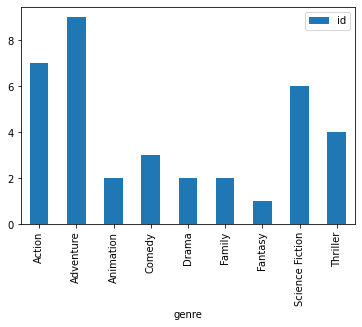

In [135]:
genre_count.plot(kind="bar")
plt.show()

### Using outer join to select actors

In [136]:
casts = pd.read_pickle('datasets/joining-data-dataset/casts.p')
casts.head()

,movie_id,cast_id,character,gender,id,name
7,5,22,Jezebel,1,3122,Sammi Davis
8,5,23,Diana,1,3123,Amanda de Cadenet
9,5,24,Athena,1,3124,Valeria Golino
3,5,25,Elspeth,1,3125,Madonna
12,5,26,Eva,1,3126,Ione Skye


In [137]:
movies[movies["title"] == "Iron Man 2"]

,id,title,popularity,release_date
3401,10138,Iron Man 2,77.300194,2010-04-28


In [138]:
iron_1_actors = casts[casts["movie_id"] == 1726].loc[:,["character","id","name"]]
iron_1_actors

,character,id,name
3,Yinsen,17857,Shaun Toub
4,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges
1,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard
7,Christine Everhart,57451,Leslie Bibb
...,...,...,...
82,Reporter (uncredited),1209728,Chris Reid
83,News Cameraman (uncredited),1209729,Toi Rose
84,Rooftop Fireman (uncredited),1209730,George F. Watson
85,Whiplash One (voice) (uncredited),1209731,David Zyler


In [139]:
iron_2_actors = casts[casts["movie_id"] == 10138].loc[:, ["character","id","name"]]
iron_2_actors

,character,id,name
4,Ivan Vanko / Whiplash,2295,Mickey Rourke
3,Natalie Rushman / Natasha Romanoff / Black Widow,1245,Scarlett Johansson
5,Justin Hammer,6807,Sam Rockwell
6,Director Nick Fury,2231,Samuel L. Jackson
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
...,...,...,...
110,US Senator (uncredited),1265840,Michael A. Templeton
111,Background (uncredited),1265841,Rosa Tyabji
112,Tony Stark Usher (uncredited),1122811,Peter Sebastian Wrobel
113,Expo Attendee (uncredited),1205141,Maria Zambrana


In [141]:
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on="id",how="outer",suffixes=["_1","_2"])
iron_1_and_2.head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow,"Virginia ""Pepper"" Potts",Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard,NaN,NaN
4,Christine Everhart,57451,Leslie Bibb,Christine Everhart,Leslie Bibb


In [143]:
m = ((iron_1_and_2["name_1"].isnull()) |
    (iron_1_and_2["name_2"].isnull()))
iron_1_and_2[m].head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,"Lt. Col. James ""Rhodey"" Rhodes / War Machine",18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


### Self Join

In [146]:
crews = pd.read_pickle('datasets/joining-data-dataset/crews.p')
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [147]:
crews_self_merged = crews.merge(crews, left_on="id",right_on="id", suffixes=["_dir","_crew"])
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [150]:
boolean_filter = ((crews_self_merged["job_dir"] == "Director") & (crews_self_merged["job_crew"] != "Director"))

direct_crews = crews_self_merged[boolean_filter]
direct_crews.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


### Index merge for movie ratings

In [277]:
ratings = pd.read_pickle('datasets/joining-data-dataset/ratings.p')
ratings.head()

,id,vote_average,vote_count
0,19995,7.2,11800.0
1,285,6.9,4500.0
2,206647,6.3,4466.0
3,49026,7.6,9106.0
4,49529,6.1,2124.0


In [278]:
movies_ratings = movies.merge(ratings, on="id")
movies_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


### Do sequels earn more?

In [279]:
sequels = pd.read_pickle('datasets/joining-data-dataset/sequels.p')
sequels = sequels.set_index('id')

In [280]:
sequels_fin = sequels.merge(financials, on='id', how='left')

In [281]:
sequels_fin = sequels_fin.set_index("id")

In [282]:
sequels_fin.head()

,title,sequel,budget,revenue
id,,,,
19995,Avatar,<NA>,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,<NA>,200000000.0,1.845034e+09
24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [283]:
sequels_fin.shape

(4803, 4)

In [284]:
sequels_fin = sequels_fin.fillna(0)

In [285]:
orig_seq = sequels_fin.merge(sequels_fin, how="inner", left_on="sequel", 
                             right_on="id", right_index=True,
                             suffixes=["_org", "_seq"])

In [286]:
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

In [287]:
orig_seq.head()

,sequel,title_org,sequel_org,budget_org,revenue_org,title_seq,sequel_seq,budget_seq,revenue_seq,diff
id,,,,,,,,,,
862,863,Toy Story,863,30000000.0,373554033.0,Toy Story 2,10193,90000000.0,4.973669e+08,123812836.0
863,10193,Toy Story 2,10193,90000000.0,497366869.0,Toy Story 3,0,200000000.0,1.066970e+09,569602834.0
675,767,Harry Potter and the Order of the Phoenix,767,150000000.0,938212738.0,Harry Potter and the Half-Blood Prince,0,250000000.0,9.339592e+08,-4253541.0
121,122,The Lord of the Rings: The Two Towers,122,79000000.0,926287400.0,The Lord of the Rings: The Return of the King,0,94000000.0,1.118889e+09,192601579.0
120,121,The Lord of the Rings: The Fellowship of the Ring,121,93000000.0,871368364.0,The Lord of the Rings: The Two Towers,122,79000000.0,9.262874e+08,54919036.0


In [288]:
orig_seq.shape

(90, 10)

In [ ]:
titles_diff = orig_seq[["title_org"]]